# Predicting Chance of Stroke Using SVM Machine Learning
The dataset being used for this project is from Fedesoriano on [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset).

### Attribute Information
1. id: unique identifier
1. gender: "Male", "Female" or "Other"
1. age: age of the patient
1. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
1. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
1. ever_married: "No" or "Yes"
1. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
1. Residence_type: "Rural" or "Urban"
1. avg_glucose_level: average glucose level in blood
1. bmi: body mass index
1. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
1. stroke: 1 if the patient had a stroke or 0 if not

In [2]:
import numpy as np
import pandas as pd

# LOAD THE DATA
stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# EXPLORE THE DATA
print(stroke_df.head(5))
print(stroke_df.tail(5))
print(stroke_df.columns)
print(stroke_df.iloc[660:670, :])
print("data types: ", stroke_df.dtypes)
# gender, ever_married, work_type, Residence_type, smoking_status are all object type
print(stroke_df["gender"].unique())         
print(stroke_df["ever_married"].unique())  
print(stroke_df["work_type"].unique())    
print(stroke_df["Residence_type"].unique())
print(stroke_df["smoking_status"].unique())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
         id  gender   age  hypertension  heart_disease e

## Converting Categorical Data to Numeric: 
These are the numerical values being used to replace the object datatypes in each column: 
* 'gender'
    * male -> 0
    * female -> 1
    * other-> 2
* 'ever_married'
    * yes -> 1
    * no -> 0
* 'work_type'
    * private -> 0
    * self-employed -> 1
    * govt_job -> 2
    * children -> 3
    * never_worked -> 4
* 'Residence_type'
    * urban -> 0
    * rural -> 1
* 'smoking_status'
    * formerly smoked -> 0
    * never smoked -> 1
    * smokes -> 2
    * unknown -> 3

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
mean:  28.893236911794666
median:  28.1
mode:  0    28.7
Name: bmi, dtype: float64


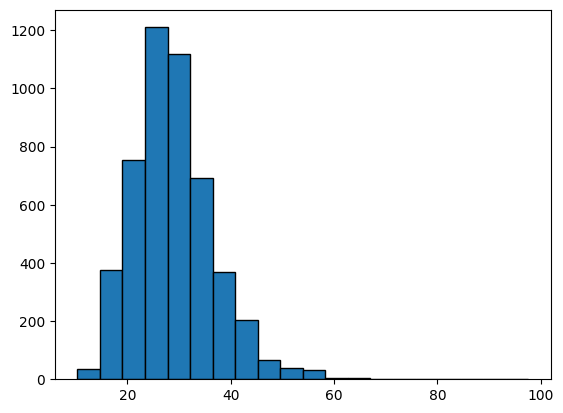

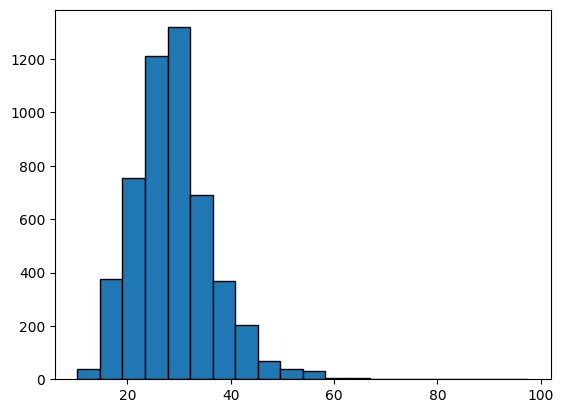

In [3]:
# CLEAN THE DATA
# HANDLE MISSING AND CATEGORICAL VALUES 
import matplotlib.pyplot as plt

# function for generating histogram
def histogram_chart(values, filename):
    plt.figure() # creates a new *current figure*
    # default number of bins is 10
    plt.hist(values, bins=20, edgecolor="black")
    plt.savefig(filename)

print(stroke_df.isnull().sum()) # there are 201 null values in the bmi column of the dataset (less than 4% of the data)
# central tendency measures:
print("mean: ", stroke_df["bmi"].mean())
print("median: ", stroke_df["bmi"].median())
print("mode: ", stroke_df["bmi"].mode())
# the mean, median, and mode are all ~28
# create a bmi histogram to determine which fillna technique to use
histogram_chart(stroke_df["bmi"], "figures/histogram_bmi_before.png")

# replace null values with median:
stroke_df["bmi"].fillna(28.1, inplace=True)

# shows the new distribution of data after null values were filled
histogram_chart(stroke_df["bmi"], "figures/histogram_bmi_after.png")

# replace categorical values with numerical representations:
stroke_df["gender"].replace(['Male', 'Female', 'Other'], [0, 1, 2], inplace=True)
stroke_df["ever_married"].replace(['Yes', 'No'], [1, 0], inplace=True)
stroke_df["work_type"].replace(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'], [0, 1, 2, 3, 4], inplace=True)
stroke_df["Residence_type"].replace(['Urban', 'Rural'], [0, 1], inplace=True)
stroke_df["smoking_status"].replace(['formerly smoked', 'never smoked', 'smokes', 'Unknown'], [0, 1, 2, 3], inplace=True)

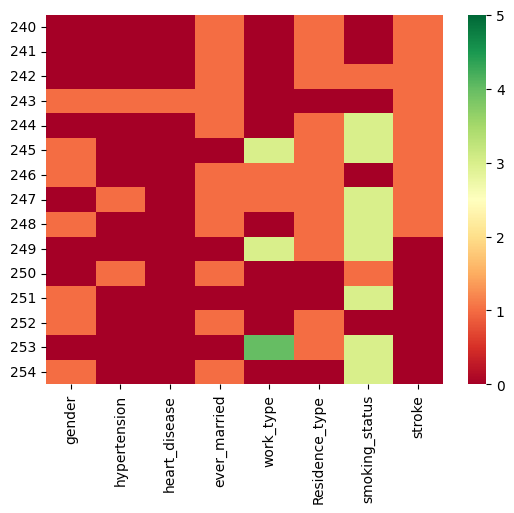

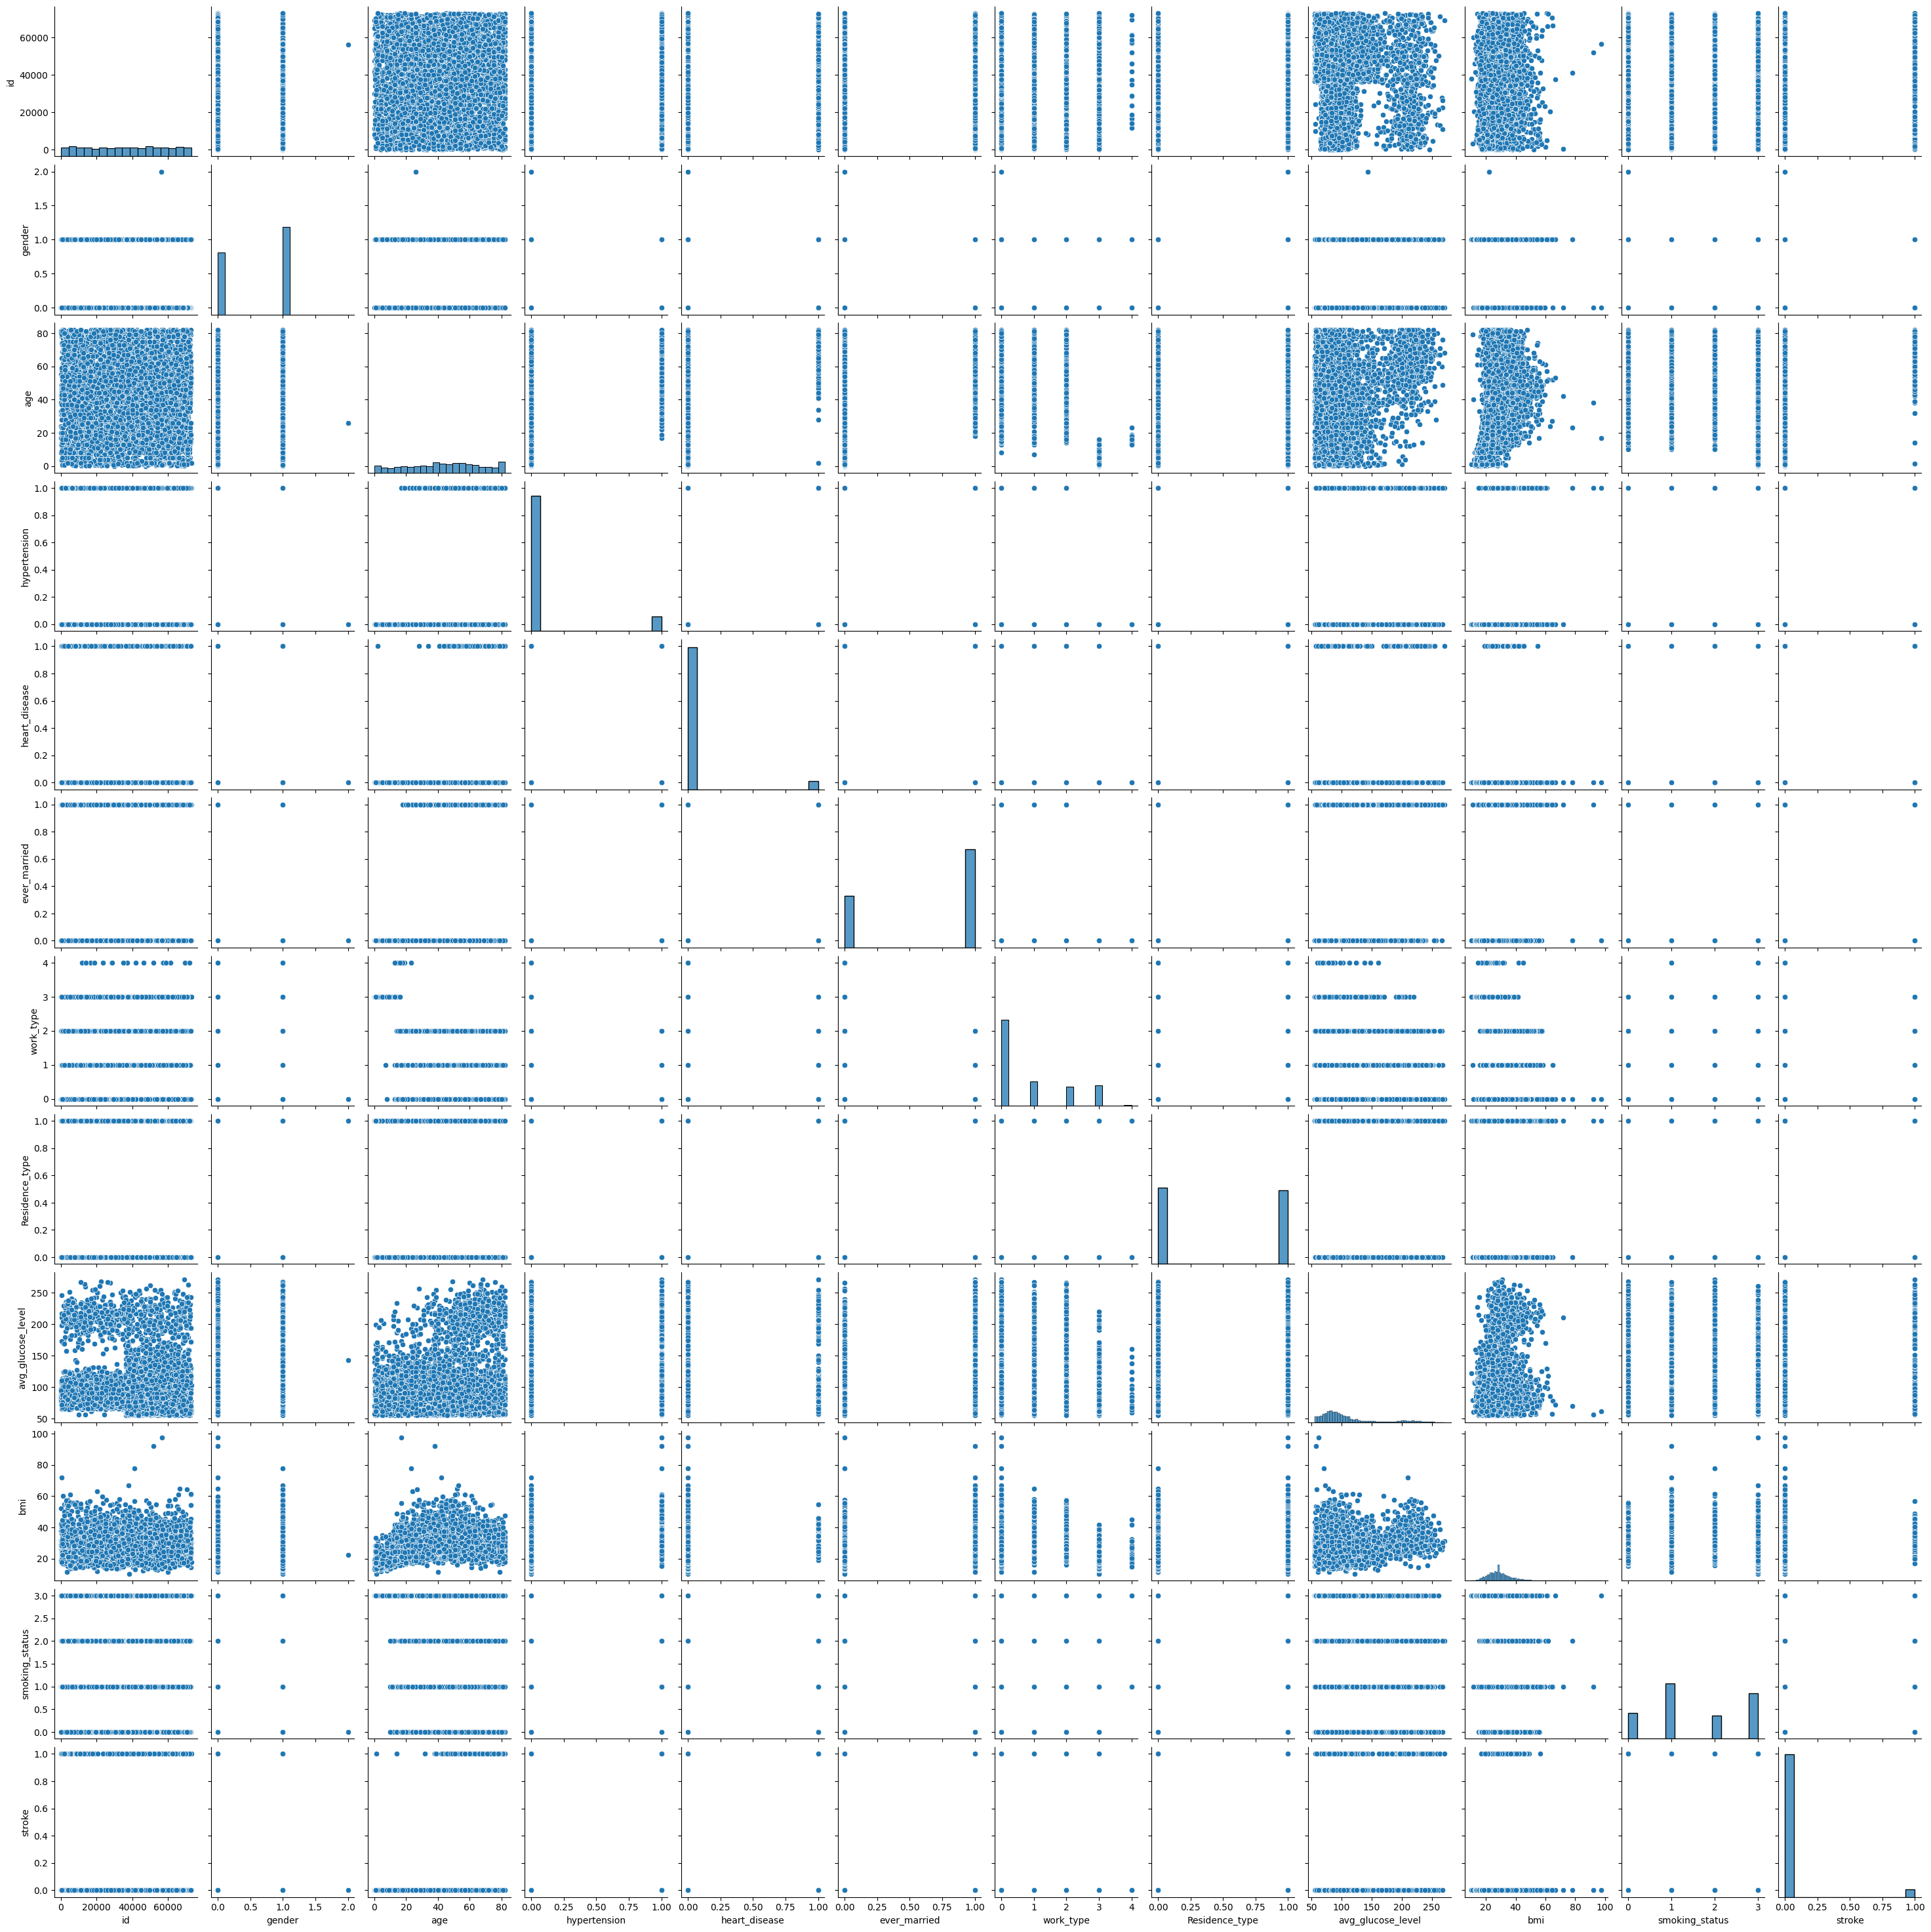

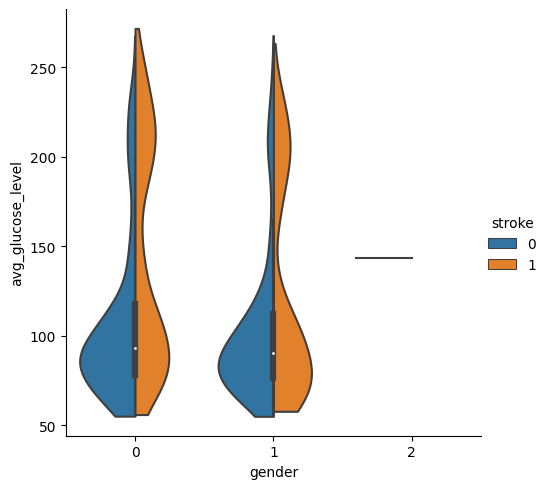

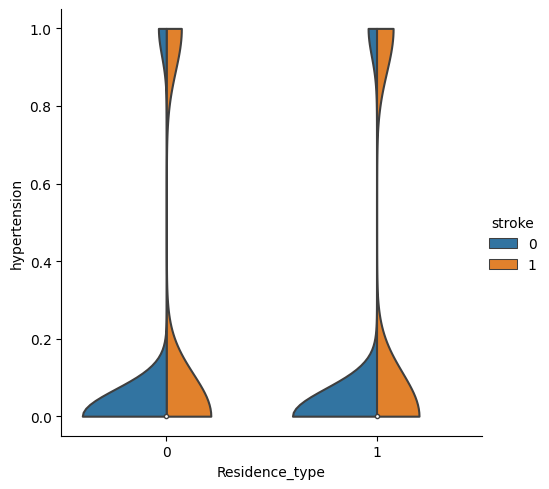

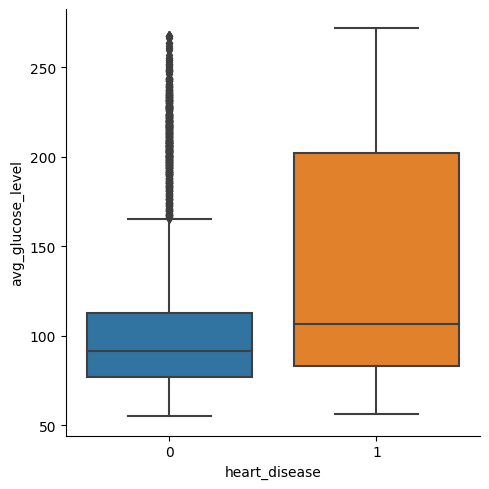

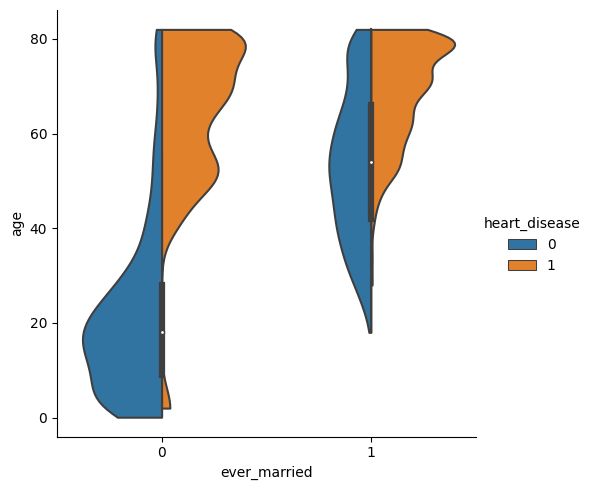

In [24]:
# VISUALIZE THE DATA
# Look for relationships between features and the target variable
# Create cat plots, heatmaps, pairplots and boxplots
import seaborn as sns

# generate a heat map:
fig, ax = plt.subplots()
stroke_df_for_heatmap = stroke_df.copy()
stroke_df_for_heatmap.drop(['id', 'age', 'avg_glucose_level', 'bmi'], axis=1, inplace=True)
sns.heatmap(stroke_df_for_heatmap.iloc[240:255, :],vmin=0, vmax=5, cmap ='RdYlGn')
plt.savefig("figures/heatmap.png")

# generate a pairplot:
sns.pairplot(stroke_df)
plt.savefig("figures/pairplot.png")

# generate some catplots and box plots
sns.catplot(stroke_df, x="gender", y="avg_glucose_level", hue="stroke", kind="violin", bw=.25, cut=0, split=True)
plt.savefig("figures/catplot_gender_glucose.png")

sns.catplot(data=stroke_df, x="Residence_type", y="hypertension", hue="stroke", kind="violin", bw=.25, cut=0, split=True)
plt.savefig("figures/catplot_Residence_hypertension.png")

sns.catplot(stroke_df, x="heart_disease", y="avg_glucose_level", kind="box")
plt.savefig("figures/catplot_heartDisease_glucose.png")

sns.catplot(stroke_df, x="ever_married", y="age", hue="heart_disease",  kind="violin", bw=.25, cut=0, split=True)
plt.savefig("figures/catplot_marriage_heartDisease.png")

## Visualization Results:
* There are not strong relationships that are easily identifiable by the heat map for this slice of the dataframe
* Age appears to be a factor in the presence of hypertension 
* A bmi greater than 60 does not correlate to a higher incidence of stroke
* Regardless of gender, higher glucose levels are associated with a higher incidence of stroke 
* There does not appear to be a strong relationship between hypertension in urban vs rural areas on stroke
* There is a pretty strong correlation between the presence of heart disease and higher avg glucose levels
* age appears to be a greater contributor to stroke than does being married

In [5]:
# SPLIT INTO TRAIN/TEST SETS
from sklearn.model_selection import train_test_split

X = stroke_df.iloc [:, : -1]    # ” : ” means it will select all rows,    “: -1 ” means that it will ignore last column
y = stroke_df.iloc [:, -1 :]    # ” : ” means it will select all rows,    “-1 : ” means that it will ignore all columns except the last one
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, random_state=0)

# Using SVM To Predict Chances of Stroke
Support Vector Machines is often used extensively with data in the healthcare sector because of its high performance when solving classification problems. 
## 2 Different Methods: 
1. Linear SVC
2. Gaussian kernel SVC

# Linear SVC:

In [10]:
from sklearn.svm import SVC
import sklearn.metrics as sm

# linear SVC
clf = SVC(kernel='linear')
clf.fit(X_train.values, y_train.values.ravel())

# PREDICT AND TRAIN THE SVC MODEL
y_predicted = clf.predict(X_test.values)

# GET PRECISION, RECALL, ACCURRACY SCORES
report = sm.classification_report(y_test['stroke'], y_predicted, labels=np.unique(y_predicted), zero_division=1)
print("classification report: \n", report)
accuracy = sm.accuracy_score(y_test['stroke'], y_predicted)
print("accuracy score: \n", accuracy)
precision = sm.precision_score(y_test['stroke'], y_predicted, labels=np.unique(y_predicted), zero_division=1)
print("precision score: \n", precision)
recall = sm.recall_score(y_test['stroke'], y_predicted, labels=np.unique(y_predicted), zero_division=1)
print("recall score \n", recall)

classification report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.00      0.00      0.00         3

    accuracy                           0.92        50
   macro avg       0.47      0.49      0.48        50
weighted avg       0.88      0.92      0.90        50

accuracy score: 
 0.92
precision score: 
 0.0
recall score 
 0.0


# Gaussian SVC:

In [14]:
# Gaussian SVC
clf_g = SVC(kernel='rbf')
clf_g.fit(X_train.values, y_train.values.ravel())

# PREDICT AND TRAIN THE SVC MODEL
y_predicted_G = clf_g.predict(X_test.values)

# GET PRECISION, RECALL, ACCURRACY SCORES
report_G = sm.classification_report(y_test['stroke'], y_predicted_G, labels=np.unique(y_predicted_G), zero_division=1)
print("Gaussian classification report: \n", report_G)
accuracy_G = sm.accuracy_score(y_test['stroke'], y_predicted_G)
print("Gaussian accuracy score: \n", accuracy_G)
precision_G = sm.precision_score(y_test['stroke'], y_predicted_G, labels=np.unique(y_predicted_G), zero_division=1)
print("Gaussian precision score: \n", precision_G)
recall_G = sm.recall_score(y_test['stroke'], y_predicted_G, labels=np.unique(y_predicted_G), zero_division=1)
print("Gaussian recall score \n", recall_G)

Gaussian classification report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        47

   micro avg       0.94      1.00      0.97        47
   macro avg       0.94      1.00      0.97        47
weighted avg       0.94      1.00      0.97        47

Gaussian accuracy score: 
 0.94
Gaussian precision score: 
 1.0
Gaussian recall score 
 0.0


# Conclusions

Between the two SVM models, the Gaussian kernel performed slightly better with an accuracy score of 94% compared to that of the linear kernel which was 92%. This makes sense because the data did not appear to have any strictly linear relaationships so it would be more difficult for a linear kernel to fit that data. It is important to note that these are the results when filling the 201 rows where 'bmi' was null with the median bmi of the dataset: 28.1. It is quite possible that running this after removing those rows from the dataset rather than introducing a nonzero increase in bias would produce different results. Another way that this algorithm could be manipulated to better train the algorithm is through the designation of training and testing data. While I used a simple holdout method with 50 rows of data being designated for testing, there are other ways to select training and testing sets. Random subsampling, k-fold cross validation and the bootstrap method are alternative ways that the data could be used to train and test the SVM models in an effort to optimize their performance. 